In [22]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [4]:
dataO = pd.read_csv('WESAD_Original.csv')

In [5]:
dataO

,ACC_0,ACC_1,ACC_2,BVP,EDA,TEMP,id,labels
0,55.0,-32.0,44.0,30.52,1.634132,35.81,2,0.0
1,49.0,-21.0,30.0,52.54,1.614912,35.81,2,0.0
2,52.0,-22.0,27.0,94.31,1.591848,35.81,2,0.0
3,58.0,-14.0,28.0,-38.86,1.558534,35.81,2,0.0
4,52.0,-22.0,27.0,94.31,1.591848,35.81,2,0.0
...,...,...,...,...,...,...,...,...
315059,-43.0,6.0,47.0,-17.38,0.858816,32.23,17,0.0
315060,-43.0,6.0,47.0,5.51,0.858816,32.21,17,0.0
315061,-43.0,6.0,47.0,-17.38,0.858816,32.23,17,0.0
315062,-43.0,6.0,47.0,8.78,0.860096,32.23,17,0.0


In [6]:
dataO.drop("id", axis=1, inplace=True)

In [7]:
dataO.drop("ACC_0", axis=1, inplace=True)

In [8]:
dataO.drop("ACC_1", axis=1, inplace=True)

In [9]:
dataO.drop("ACC_2", axis=1, inplace=True)

In [10]:
dataO.drop("BVP", axis=1, inplace=True)

In [11]:
dataO.drop("TEMP", axis=1, inplace=True)

In [15]:
dataO

,EDA,labels
0,1.634132,0.0
1,1.614912,0.0
2,1.591848,0.0
3,1.558534,0.0
4,1.591848,0.0
...,...,...
315059,0.858816,0.0
315060,0.858816,0.0
315061,0.858816,0.0
315062,0.860096,0.0


In [16]:
dataO.describe()

,EDA,labels
count,315064.000000,315064.000000
mean,1.877177,0.177135
std,2.528897,0.381784
min,0.074584,0.000000
25%,0.312404,0.000000
50%,0.798588,0.000000
75%,2.625442,0.000000
max,15.921474,1.000000


In [17]:
dataO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315064 entries, 0 to 315063
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   EDA     315064 non-null  float64
 1   labels  315064 non-null  float64
dtypes: float64(2)
memory usage: 4.8 MB


NORMALIZE

In [20]:
X = dataO.drop(columns=['labels'])
y = dataO['labels']

In [23]:
def normalize_data(X):
    return (X - np.mean(X)) / np.std(X)

def denormalize_data(normalized_data, original_data):
    return normalized_data * np.std(original_data) + np.mean(original_data)

X = normalize_data(X)

In [24]:
denormalized_data = denormalize_data(X, dataO.drop(columns=['labels']))

In [25]:
X

,EDA
0,-0.096107
1,-0.103708
2,-0.112828
3,-0.126001
4,-0.112828
...,...
315059,-0.402691
315060,-0.402691
315061,-0.402691
315062,-0.402184


In [26]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
315059    0.0
315060    0.0
315061    0.0
315062    0.0
315063    0.0
Name: labels, Length: 315064, dtype: float64

In [27]:
y.value_counts()

labels
0.0    259255
1.0     55809
Name: count, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

EVALVACIA

In [29]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'SGD': SGDClassifier(),
    'NB': GaussianNB(),
    'GBT': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'ANN': MLPClassifier()
}

#evalvácia
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy}')

best_model = max(results, key=results.get)
print(f'Best Model: {best_model}')

Logistic Regression Accuracy: 0.8229571675685969
Decision Tree Accuracy: 0.9072254931522067
Random Forest Accuracy: 0.9071302747052196
SVM Accuracy: 0.8229571675685969
k-NN Accuracy: 0.89053052544713
SGD Accuracy: 0.8229571675685969
NB Accuracy: 0.8229571675685969
GBT Accuracy: 0.8355577420532271
XGBoost Accuracy: 0.8357481789472013


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ANN Accuracy: 0.8242902258264168
Best Model: Decision Tree


In [30]:
from sklearn.metrics import classification_report

models = {
    #out 'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    #out 'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    #out 'SGD': SGDClassifier(),
    #out 'NB': GaussianNB(),
    #out 'GBT': GradientBoostingClassifier(),
    #out 'XGBoost': XGBClassifier(),
    #out 'ANN': MLPClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f'{model_name} Classification Report:\n{report}')

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     51857
         1.0       0.77      0.68      0.72     11156

    accuracy                           0.91     63013
   macro avg       0.85      0.82      0.83     63013
weighted avg       0.90      0.91      0.91     63013

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     51857
         1.0       0.76      0.70      0.73     11156

    accuracy                           0.91     63013
   macro avg       0.85      0.83      0.84     63013
weighted avg       0.90      0.91      0.91     63013

k-NN Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93     51857
         1.0       0.70      0.66      0.68     11156

    accuracy                           0.89     63013
   macro avg       0.82   

In [31]:
from sklearn.model_selection import cross_val_score

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# 5 násobná krížová validácia
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{model_name} Cross-Validation Mean Accuracy: {scores.mean()}')

Decision Tree Cross-Validation Mean Accuracy: 0.9056936881039797
Random Forest Cross-Validation Mean Accuracy: 0.9050628609658601


Hyperparametre

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_classifier = RandomForestClassifier()

param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(1, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

accuracy = random_search.score(X_test, y_test)
print("Accuracy:", accuracy)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'bootstrap': True, 'max_depth': 31, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 76}
Accuracy: 0.8997043540584124


TRÉNOVANIE

In [32]:
best_params = {'bootstrap': True, 'max_depth': 31, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 76}

best_model = RandomForestClassifier(**best_params)

best_model.fit(X_train, y_train)

feature_importances = best_model.feature_importances_

print("Feature Importances:", feature_importances)

Feature Importances: [1.]


In [34]:
from sklearn.ensemble import VotingClassifier

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'k-NN': KNeighborsClassifier()
}

models_for_voting = [('Decision Tree', models['Decision Tree']),
                     ('Random Forest', models['Random Forest'])]

voting_classifier = VotingClassifier(estimators=models_for_voting, voting='hard')
voting_classifier.fit(X_train, y_train)
accuracy = voting_classifier.score(X_test, y_test)
print("Voting Classifier Accuracy:", accuracy)

Voting Classifier Accuracy: 0.9071620141875486


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

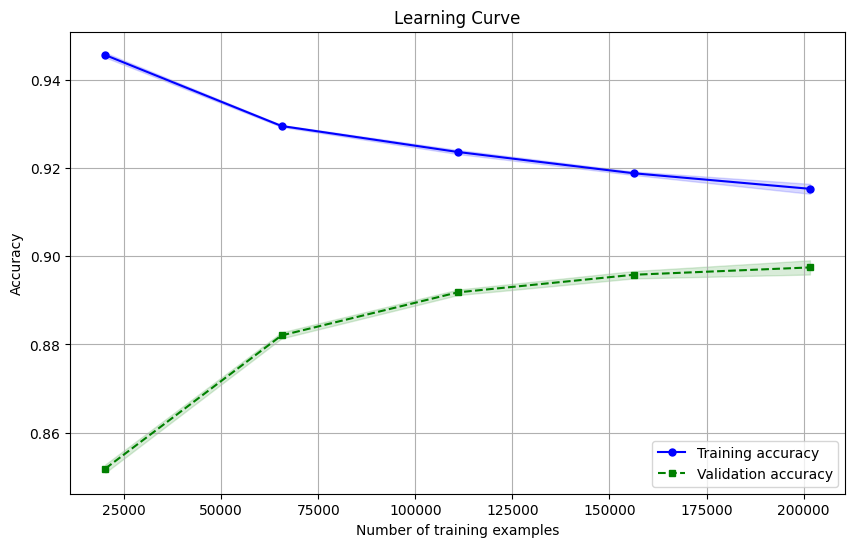

In [36]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.show()

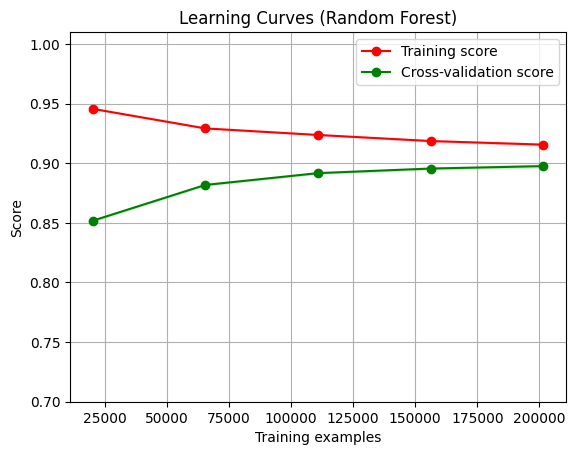

In [37]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
title = "Learning Curves (Random Forest)"
plot_learning_curve(best_model, title, X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)

plt.show()

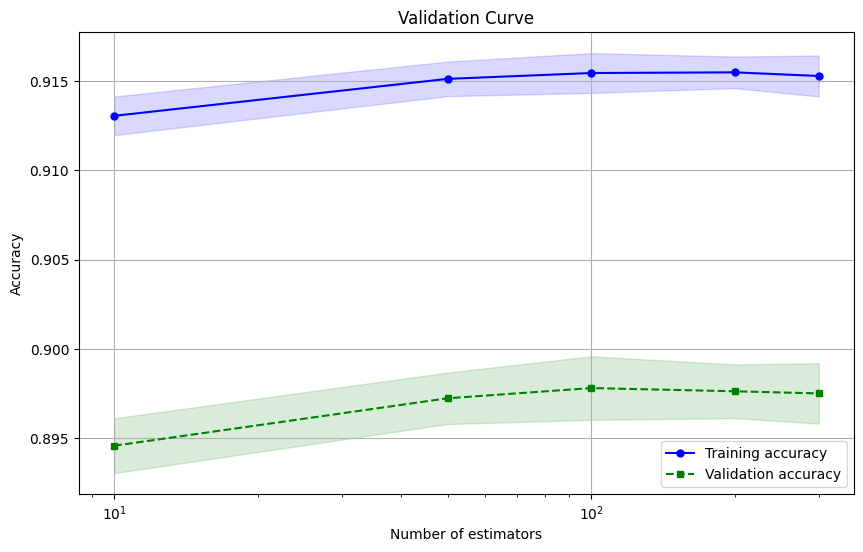

In [38]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

param_range = [10, 50, 100, 200, 300]

train_scores, test_scores = validation_curve(
    RandomForestClassifier(**best_params),
    X_train,
    y_train,
    param_name="n_estimators",
    param_range=param_range,
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.show()

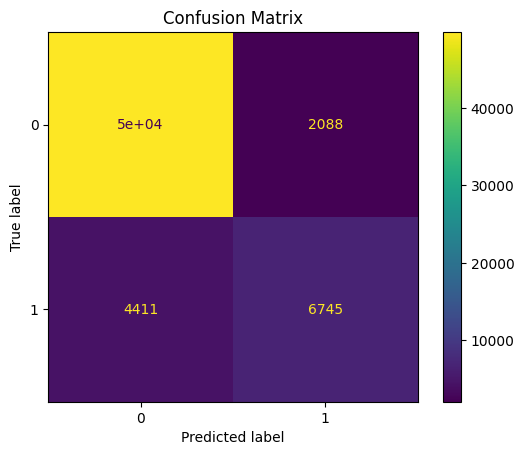

In [39]:
# Confusion Matrix
cm = confusion_matrix(y_test, best_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

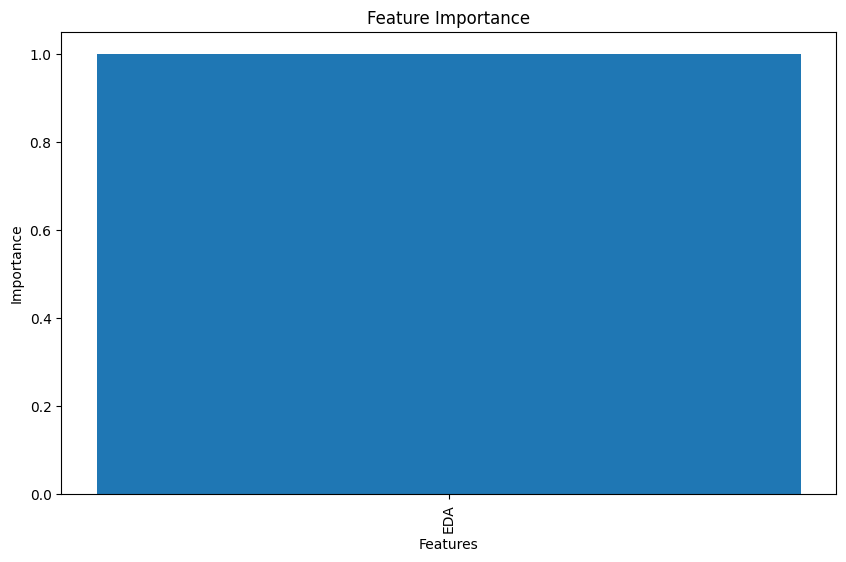

In [40]:
# Feature Importance Plot
feature_importances = best_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx], align='center')
plt.xticks(range(X_train.shape[1]), features[sorted_idx], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

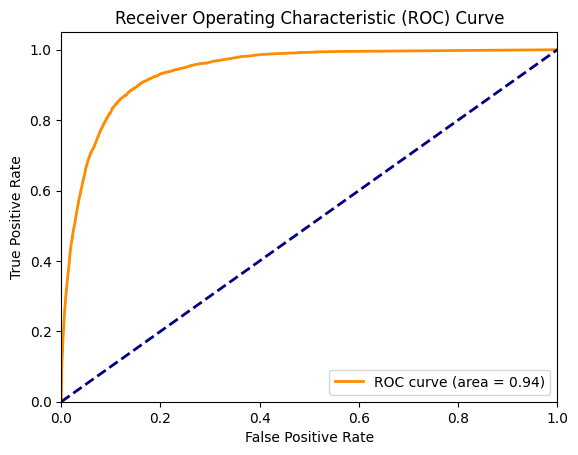

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

FINAL

In [42]:
import joblib
joblib.dump(best_model, 'Originalsample_model_EDA.pkl')

['Originalsample_model_EDA.pkl']

In [43]:
loaded_model = joblib.load('Originalsample_model_EDA.pkl')
new_data_predictions = loaded_model.predict(X_test)
predictions_df = pd.DataFrame(new_data_predictions, columns=['predictions'])
predictions_df

,predictions
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
63008,0.0
63009,0.0
63010,0.0
63011,0.0


In [44]:
y_test

195097    0.0
219108    0.0
275610    0.0
152899    0.0
120310    0.0
         ... 
271531    0.0
147195    0.0
69695     0.0
69332     0.0
23546     1.0
Name: labels, Length: 63013, dtype: float64

In [45]:
traget_df = y_test.reset_index(drop=True)

In [46]:
aligned_df = pd.concat([predictions_df, traget_df], axis=1)

aligned_df

,predictions,labels
0,0.0,0.0
1,1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
63008,0.0,0.0
63009,0.0,0.0
63010,0.0,0.0
63011,0.0,0.0


In [47]:
same_values = (aligned_df['predictions'] == aligned_df['labels']).sum()
different_values = (aligned_df['predictions'] != aligned_df['labels']).sum()

print("Number of rows with the same values:", same_values)
print("Number of rows with different values:", different_values)

Number of rows with the same values: 56514
Number of rows with different values: 6499
